In [1]:
#Thêm thư viện và đọc file excel
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('C:/Users/HOANG NAM/Desktop/Khai thác DL/lab2/bai1.csv')
df.head(10)

,Transaction ID,Items
0,T1,"HotDogs, Buns, Ketchup"
1,T2,"HotDogs, Buns"
2,T3,"HotDogs, Coke, Chips"
3,T4,"Chips, Coke"
4,T5,"Chips, Ketchup"
5,T6,"HotDogs, Coke, Chips"


In [2]:
#Hiển thị thông tin dữ liệu
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
Transaction ID    6 non-null object
Items             6 non-null object
dtypes: object(2)
memory usage: 224.0+ bytes


In [3]:
#Thêm columns 
df["HotDogs"] = 0
df["Buns"] = 0
df["Ketchup"] = 0
df["Coke"] = 0
df["Chips"] = 0

In [4]:
#Chuyển dữ liệu sang dạng one-hot-encoder
for i in range(6):
    a = df.iloc[i,1].split(", ")
    for j in a:
        df.ix[i,j] = 1

In [5]:
#Xóa columns dư thừa
df = df.drop(['Items'],axis=1)
df = df.drop(['Transaction ID'],axis=1)

In [6]:
#Hiển thị dữ liệu sau tiền xử lý
df.head(10)

,HotDogs,Buns,Ketchup,Coke,Chips
0,1,1,1,0,0
1,1,1,0,0,0
2,1,0,0,1,1
3,0,0,0,1,1
4,0,0,1,0,1
5,1,0,0,1,1


In [7]:
#Thực thi thuật toán Apriori với min_support = 0.33
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
itemsets = apriori(df, min_support=0.33, use_colnames=True)

In [8]:
#Hiển thị kết quả tập phổ biến tìm được
itemsets.head()

,support,itemsets
0,0.666667,(HotDogs)
1,0.333333,(Buns)
2,0.333333,(Ketchup)
3,0.500000,(Coke)
4,0.666667,(Chips)


In [9]:
#Tìm luật với min_conf=0.6
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)

In [10]:
#Hiển thị kết quả
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Buns),(HotDogs),0.333333,0.666667,0.333333,1.000000,1.5,0.111111,inf
1,(Coke),(HotDogs),0.500000,0.666667,0.333333,0.666667,1.0,0.000000,1.0
2,(Coke),(Chips),0.500000,0.666667,0.500000,1.000000,1.5,0.166667,inf
3,(Chips),(Coke),0.666667,0.500000,0.500000,0.750000,1.5,0.166667,2.0
4,"(Coke, Chips)",(HotDogs),0.500000,0.666667,0.333333,0.666667,1.0,0.000000,1.0


In [11]:
#Hiển thị luật 
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")

In [12]:
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],'==>',rules.loc[i,'consequents'],
         '[',rules.loc[i,'support'],',',rules.loc[i,'confidence'],']')

Buns ==> HotDogs [ 0.3333333333333333 , 1.0 ]
Coke ==> HotDogs [ 0.3333333333333333 , 0.6666666666666666 ]
Coke ==> Chips [ 0.5 , 1.0 ]
Chips ==> Coke [ 0.5 , 0.75 ]
Coke ==> HotDogs [ 0.3333333333333333 , 0.6666666666666666 ]
Coke ==> Chips [ 0.3333333333333333 , 1.0 ]
Chips ==> Coke [ 0.3333333333333333 , 1.0 ]
Coke ==> Chips [ 0.3333333333333333 , 0.6666666666666666 ]


In [13]:
#Lấy giá trị cần thiết để vẽ đồ thị
support = rules['support'].values
confidence=rules['confidence'].values

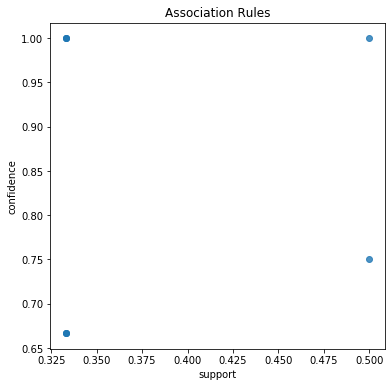

In [14]:
#Vẽ đồ thị
plt.figure(figsize=(6,6))
plt.title('Association Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence,fit_reg=False)

In [15]:
#Thực thi giải thuật FpGrowth với min_sup=0.33
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(df, min_support=0.33, use_colnames=True)

In [16]:
#Hiể thị các luật tìm được
rules = association_rules(itemsets, metric="confidence", min_threshold=0.6)
rules.head()
rules["antecedents"] = rules["antecedents"].apply(lambda x: list(x)[0]).astype("unicode")
rules["consequents"] = rules["consequents"].apply(lambda x: list(x)[0]).astype("unicode")
for i in range(len(rules)):
    print(rules.loc[i,'antecedents'],'==>',rules.loc[i,'consequents'],
         '[',rules.loc[i,'support'],',',rules.loc[i,'confidence'],']')

Buns ==> HotDogs [ 0.3333333333333333 , 1.0 ]
Coke ==> Chips [ 0.5 , 1.0 ]
Chips ==> Coke [ 0.5 , 0.75 ]
Coke ==> HotDogs [ 0.3333333333333333 , 0.6666666666666666 ]
Coke ==> HotDogs [ 0.3333333333333333 , 0.6666666666666666 ]
Coke ==> Chips [ 0.3333333333333333 , 1.0 ]
Chips ==> Coke [ 0.3333333333333333 , 1.0 ]
Coke ==> Chips [ 0.3333333333333333 , 0.6666666666666666 ]
